# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.081801e+01     7.430618e+00
 * time: 0.003103971481323242
     1     2.832222e+01     4.396687e+00
 * time: 0.014142036437988281
     2     2.098941e+01     6.126299e+00
 * time: 0.027917861938476562
     3     1.454371e+01     4.379003e+00
 * time: 0.041322946548461914
     4     1.113051e+01     1.466455e+00
 * time: 0.10712099075317383
     5     1.014828e+01     2.284159e+00
 * time: 0.1174478530883789
     6     9.501383e+00     1.311614e+00
 * time: 0.1274549961090088
     7     8.925752e+00     8.980961e-01
 * time: 0.13739895820617676
     8     8.497290e+00     1.151963e+00
 * time: 0.147352933883667
     9     8.278529e+00     7.874870e-01
 * time: 0.15740299224853516
    10     8.158238e+00     7.684327e-01
 * time: 0.16741180419921875
    11     8.045908e+00     6.958202e-01
 * time: 0.17731595039367676
    12     7.988774e+00     6.511879e-01
 * time: 0.18480396270751953
    13     7.939105e+00     5.052605e-01
 * time:

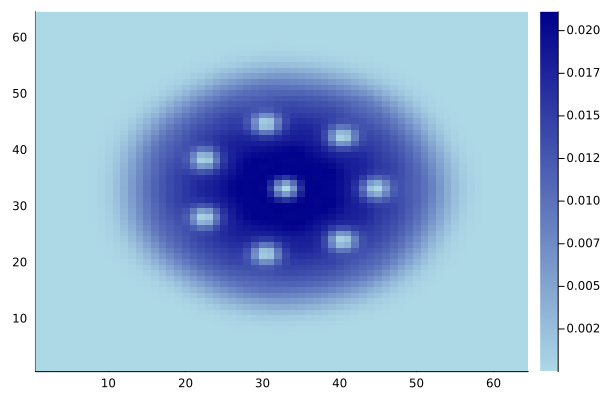

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)